In [1]:
# GHOST - Euler Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 4

# geometry mapping degree (isoparametric)
p_geo = p

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_L10_x_11y_11.msh")

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,10.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,10.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2, L=10.0), p_geo=p_geo)

# volume and facet quadrature degrees
tau = 2*p
mu = 2*p+1

# solver parameters
params = {"project_title": "euler_p4c0t1",
         "problem": "compressible_euler",
         "specific_heat_ratio": 1.4,
         "numerical_flux": "roe",
         "initial_condition": "isentropic_vortex",
         "initial_vortex_centre": np.array([5.0,5.0]),
         "background_temperature": 1.0,
         "background_velocity": np.array([1.0,1.0]),
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu,
         "solution_representation": "modal",
         "form": "weak",
         "time_integrator": "rk44",
         "final_time": 10.0,
         "time_step_scale": 0.005}

# set up solver
solver = Solver(params,mesh)
weak = Solver(params,mesh)
params_strong = params.copy()
params_strong["form"] = "strong"
strong = Solver(params_strong,mesh)

In [2]:
strong.run(write_interval=0.01)
strong.post_process(error_quadrature_degree=4*p)

dt =  0.0002777777777777778
writing every  36  time steps, total  36000
writing time step  36 : t =  0.01
max:  5.79301613037141
writing time step  72 : t =  0.019999999999999976
max:  5.793836646582057
writing time step  108 : t =  0.029999999999999916
max:  5.79449338958304
writing time step  144 : t =  0.039999999999999966
max:  5.7951745963389385
writing time step  180 : t =  0.05000000000000003
max:  5.795924048364917
writing time step  216 : t =  0.060000000000000095
max:  5.796700898668495
writing time step  252 : t =  0.07000000000000016
max:  5.797434040027469
writing time step  288 : t =  0.08000000000000022
max:  5.7980591966370145
writing time step  324 : t =  0.09000000000000029
max:  5.79853769553629
writing time step  360 : t =  0.10000000000000035
max:  5.798860637571358
writing time step  396 : t =  0.11000000000000042
max:  5.7990436291728
writing time step  432 : t =  0.12000000000000048
max:  5.799116922413694
writing time step  468 : t =  0.13000000000000028
max:  

writing time step  3996 : t =  1.1100000000000794
max:  5.782439191292626
writing time step  4032 : t =  1.120000000000081
max:  5.786767439434413
writing time step  4068 : t =  1.1300000000000825
max:  5.791012166321671
writing time step  4104 : t =  1.140000000000084
max:  5.795188201805875
writing time step  4140 : t =  1.1500000000000856
max:  5.799309621366362
writing time step  4176 : t =  1.1600000000000872
max:  5.803389276321252
writing time step  4212 : t =  1.1700000000000887
max:  5.807438369432646
writing time step  4248 : t =  1.1800000000000903
max:  5.811466089702326
writing time step  4284 : t =  1.1900000000000919
max:  5.815479317010865
writing time step  4320 : t =  1.2000000000000934
max:  5.819482404089401
writing time step  4356 : t =  1.210000000000095
max:  5.82347704009375
writing time step  4392 : t =  1.2200000000000966
max:  5.827462196363175
writing time step  4428 : t =  1.2300000000000981
max:  5.831434157279014
writing time step  4464 : t =  1.240000000

writing time step  8028 : t =  2.2300000000002544
max:  5.815204415615838
writing time step  8064 : t =  2.240000000000256
max:  5.8170483816369
writing time step  8100 : t =  2.2500000000002576
max:  5.818777035261964
writing time step  8136 : t =  2.260000000000259
max:  5.8203919650030365
writing time step  8172 : t =  2.2700000000002607
max:  5.821894393484874
writing time step  8208 : t =  2.2800000000002623
max:  5.823285382917132
writing time step  8244 : t =  2.290000000000264
max:  5.824566026632366
writing time step  8280 : t =  2.3000000000002654
max:  5.825737613046802
writing time step  8316 : t =  2.310000000000267
max:  5.826801751592034
writing time step  8352 : t =  2.3200000000002685
max:  5.827760453673861
writing time step  8388 : t =  2.33000000000027
max:  5.828616165301871
writing time step  8424 : t =  2.3400000000002716
max:  5.8293717513268355
writing time step  8460 : t =  2.350000000000273
max:  5.830030434546929
writing time step  8496 : t =  2.360000000000

writing time step  12024 : t =  3.340000000000428
max:  5.896964719103838
writing time step  12060 : t =  3.3500000000004295
max:  5.8968127855952375
writing time step  12096 : t =  3.360000000000431
max:  5.896622077125902
writing time step  12132 : t =  3.3700000000004326
max:  5.896393809702519
writing time step  12168 : t =  3.380000000000434
max:  5.896129349209678
writing time step  12204 : t =  3.3900000000004358
max:  5.895830175284747
writing time step  12240 : t =  3.4000000000004373
max:  5.895497836257399
writing time step  12276 : t =  3.410000000000439
max:  5.895133902155994
writing time step  12312 : t =  3.4200000000004405
max:  5.894739918667874
writing time step  12348 : t =  3.430000000000442
max:  5.894317311341614
writing time step  12384 : t =  3.4400000000004436
max:  5.893867425994432
writing time step  12420 : t =  3.450000000000445
max:  5.896464186641237
writing time step  12456 : t =  3.4600000000004467
max:  5.899283655052818
writing time step  12492 : t =

writing time step  16020 : t =  4.4500000000006015
max:  5.854998288543208
writing time step  16056 : t =  4.460000000000603
max:  5.858644026869427
writing time step  16092 : t =  4.470000000000605
max:  5.862166096711708
writing time step  16128 : t =  4.480000000000606
max:  5.86556309409963
writing time step  16164 : t =  4.490000000000608
max:  5.868833766990826
writing time step  16200 : t =  4.500000000000609
max:  5.871977012389799
writing time step  16236 : t =  4.510000000000611
max:  5.8749918710100015
writing time step  16272 : t =  4.520000000000612
max:  5.8778775194450965
writing time step  16308 : t =  4.530000000000614
max:  5.880633259998363
writing time step  16344 : t =  4.5400000000006155
max:  5.883258508504661
writing time step  16380 : t =  4.550000000000617
max:  5.885752780614962
writing time step  16416 : t =  4.560000000000619
max:  5.8881156770877165
writing time step  16452 : t =  4.57000000000062
max:  5.890346868648971
writing time step  16488 : t =  4.5

writing time step  20016 : t =  5.560000000000775
max:  5.9096023631612
writing time step  20052 : t =  5.5700000000007766
max:  5.911550351519845
writing time step  20088 : t =  5.580000000000778
max:  5.913365205358211
writing time step  20124 : t =  5.59000000000078
max:  5.915047310180388
writing time step  20160 : t =  5.600000000000781
max:  5.916597121084438
writing time step  20196 : t =  5.610000000000783
max:  5.918015147851819
writing time step  20232 : t =  5.620000000000784
max:  5.919301937807759
writing time step  20268 : t =  5.630000000000786
max:  5.920458056771685
writing time step  20304 : t =  5.6400000000007875
max:  5.921484068471983
writing time step  20340 : t =  5.650000000000789
max:  5.9223805128793705
writing time step  20376 : t =  5.660000000000791
max:  5.923147884005604
writing time step  20412 : t =  5.670000000000792
max:  5.923786607797252
writing time step  20448 : t =  5.680000000000794
max:  5.924297020815099
writing time step  20484 : t =  5.6900

writing time step  24012 : t =  6.6700000000009485
max:  5.849128448145274
writing time step  24048 : t =  6.68000000000095
max:  5.8491490654917175
writing time step  24084 : t =  6.690000000000952
max:  5.84903054759407
writing time step  24120 : t =  6.700000000000953
max:  5.848772445278203
writing time step  24156 : t =  6.710000000000955
max:  5.84837458496655
writing time step  24192 : t =  6.720000000000956
max:  5.847837032002711
writing time step  24228 : t =  6.730000000000958
max:  5.8471599160374526
writing time step  24264 : t =  6.7400000000009594
max:  5.846343590823592
writing time step  24300 : t =  6.750000000000961
max:  5.845388662611516
writing time step  24336 : t =  6.760000000000963
max:  5.844295982365177
writing time step  24372 : t =  6.770000000000964
max:  5.843066626146236
writing time step  24408 : t =  6.780000000000966
max:  5.841701883074803
writing time step  24444 : t =  6.790000000000967
max:  5.840203258150184
writing time step  24480 : t =  6.800

writing time step  28008 : t =  7.780000000001122
max:  5.718059255693465
writing time step  28044 : t =  7.790000000001124
max:  5.718207718926921
writing time step  28080 : t =  7.800000000001125
max:  5.718298225399114
writing time step  28116 : t =  7.810000000001127
max:  5.718333564588124
writing time step  28152 : t =  7.820000000001128
max:  5.718315915404906
writing time step  28188 : t =  7.83000000000113
max:  5.718246818602984
writing time step  28224 : t =  7.840000000001131
max:  5.718127176371513
writing time step  28260 : t =  7.850000000001133
max:  5.717957278297625
writing time step  28296 : t =  7.8600000000011345
max:  5.71773685171424
writing time step  28332 : t =  7.870000000001136
max:  5.717465140693952
writing time step  28368 : t =  7.880000000001138
max:  5.717141038643543
writing time step  28404 : t =  7.890000000001139
max:  5.716763223969119
writing time step  28440 : t =  7.900000000001141
max:  5.716330263037967
writing time step  28476 : t =  7.91000

writing time step  32040 : t =  8.89999999999842
max:  5.747569647791166
writing time step  32076 : t =  8.909999999998389
max:  5.746023426035914
writing time step  32112 : t =  8.919999999998359
max:  5.74425091026144
writing time step  32148 : t =  8.929999999998328
max:  5.742261029866315
writing time step  32184 : t =  8.939999999998298
max:  5.740063331569742
writing time step  32220 : t =  8.949999999998267
max:  5.737668059027198
writing time step  32256 : t =  8.959999999998237
max:  5.735086091648276
writing time step  32292 : t =  8.969999999998207
max:  5.732328740003038
writing time step  32328 : t =  8.979999999998176
max:  5.729407684181101
writing time step  32364 : t =  8.989999999998146
max:  5.726334913437116
writing time step  32400 : t =  8.999999999998115
max:  5.7231225614020955
writing time step  32436 : t =  9.009999999998085
max:  5.719782816588695
writing time step  32472 : t =  9.019999999998054
max:  5.716327843449351
writing time step  32508 : t =  9.02999

In [3]:
weak.run(write_interval=0.01)
weak.post_process(error_quadrature_degree=4*p)

dt =  0.0002777777777777778
writing every  36  time steps, total  36000
writing time step  36 : t =  0.01
max:  5.79301613037141
writing time step  72 : t =  0.019999999999999976
max:  5.793836646582057
writing time step  108 : t =  0.029999999999999916
max:  5.79449338958304
writing time step  144 : t =  0.039999999999999966
max:  5.7951745963389385
writing time step  180 : t =  0.05000000000000003
max:  5.795924048364917
writing time step  216 : t =  0.060000000000000095
max:  5.796700898668495
writing time step  252 : t =  0.07000000000000016
max:  5.797434040027469
writing time step  288 : t =  0.08000000000000022
max:  5.7980591966370145
writing time step  324 : t =  0.09000000000000029
max:  5.79853769553629
writing time step  360 : t =  0.10000000000000035
max:  5.798860637571357
writing time step  396 : t =  0.11000000000000042
max:  5.799043629172799
writing time step  432 : t =  0.12000000000000048
max:  5.799116922413693
writing time step  468 : t =  0.13000000000000028
max:

KeyboardInterrupt: 

In [10]:
for e in range(0,4):
    print("{:.3e}".format((strong.I_f - strong.I_0)[e]), "& ", 
    "{:.3e}".format(strong.calculate_error()[e]), " \\\\")

4.974e-13 &  2.282e-02  \\
5.969e-13 &  4.171e-02  \\
1.037e-12 &  3.520e-02  \\
2.217e-12 &  9.720e-02  \\


In [4]:
strong.I_f - strong.I_0

array([4.97379915e-13, 5.96855898e-13, 1.03739239e-12, 2.21689334e-12])

In [6]:
strong.calculate_error()

array([0.02281962, 0.04171265, 0.03519828, 0.0971959 ])

In [12]:
import pickle
pickle.dump(strong.u_hat,open("../results/euler_p4c0t1/strong_final.dat", "wb"))

In [13]:
for e in range(0,4):
    print("{:.3e}".format((strong.I_f - strong.I_0)[e]))

4.974e-13
5.969e-13
1.037e-12
2.217e-12


In [16]:
np.amin(strong.u_hv_global[0])

0.49199325925197057

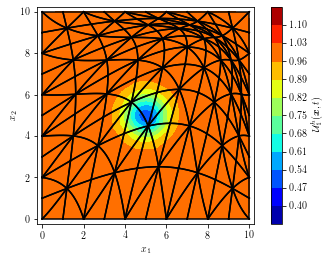

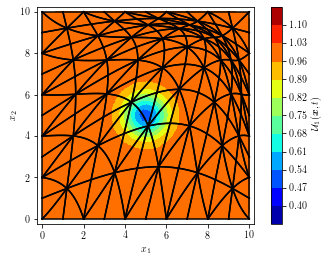

In [17]:
strong.plot(u_range=(0.4,1.1))